<a href="https://colab.research.google.com/github/ammn23/car-image/blob/main/dec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install roboflow ultralytics

from roboflow import Roboflow
import os
from pathlib import Path

# Create organized structure
os.makedirs('datasets/raw', exist_ok=True)

# Your API key
api_key = "cDOoQRw8t3uH8yKVa78m"

print("🚗 Downloading Car Condition Datasets")
print("="*50)

# =============================================================================
# DOWNLOAD ALL YOUR DATASETS
# =============================================================================

def download_all_datasets():
    """Download all your specified datasets"""

    rf = Roboflow(api_key=api_key)

    datasets_to_download = [
        {
            'name': 'dirt-car-v4',
            'workspace': 'fall-on7ds',
            'project': 'dirt-car-450x3',
            'version': 4,
            'description': 'Dirt car detection v4'
        },
        {
            'name': 'dirt-car-v3',
            'workspace': 'fall-on7ds',
            'project': 'dirt-car-450x3',
            'version': 3,
            'description': 'Dirt car detection v3'
        },
        {
            'name': 'dirt-car-v2',
            'workspace': 'fall-on7ds',
            'project': 'dirt-car-450x3',
            'version': 2,
            'description': 'Dirt car detection v2'
        },
        {
            'name': 'dirt-car-v1',
            'workspace': 'fall-on7ds',
            'project': 'dirt-car-450x3',
            'version': 1,
            'description': 'Dirt car detection v1'
        },
        {
            'name': 'scratch-dent-v3',
            'workspace': 'car-damage-ymlgz',
            'project': 'scratch-dent-car',
            'version': 3,
            'description': 'Scratch and dent detection'
        },
        {
            'name': 'rust-detection-v4',
            'workspace': 'personal-iisqb',
            'project': 'rust-detection-xj8bu',
            'version': 4,
            'description': 'Rust detection'
        },
        {
            'name': 'dent-detection-v1',
            'workspace': 'chetan-uonol',
            'project': 'dent-as7fc',
            'version': 1,
            'description': 'Dent detection'
        }
    ]

    downloaded_datasets = []

    for dataset_info in datasets_to_download:
        try:
            print(f"\n⬇️ Downloading {dataset_info['name']}...")
            print(f"   📝 {dataset_info['description']}")

            project = rf.workspace(dataset_info['workspace']).project(dataset_info['project'])
            version = project.version(dataset_info['version'])

            # Download to organized folder
            download_path = f"datasets/raw/{dataset_info['name']}"
            dataset = version.download("yolov8", location=download_path)

            downloaded_datasets.append({
                'name': dataset_info['name'],
                'path': download_path,
                'info': dataset_info
            })

            print(f"   ✅ Downloaded to: {download_path}")

        except Exception as e:
            print(f"   ❌ Error downloading {dataset_info['name']}: {e}")

    print(f"\n📊 DOWNLOAD SUMMARY:")
    print(f"Successfully downloaded {len(downloaded_datasets)}/{len(datasets_to_download)} datasets")

    return downloaded_datasets

# Download all datasets
downloaded = download_all_datasets()

# =============================================================================
# QUICK ANALYSIS OF DOWNLOADED DATASETS
# =============================================================================

def quick_dataset_overview():
    """Quick overview of what was downloaded"""

    print(f"\n🔍 QUICK DATASET OVERVIEW")
    print("="*50)

    raw_path = Path("datasets/raw")

    total_images = 0
    dataset_summary = []

    for dataset_folder in raw_path.iterdir():
        if dataset_folder.is_dir():
            print(f"\n📁 {dataset_folder.name}")

            # Check for data.yaml
            yaml_file = dataset_folder / 'data.yaml'
            classes = "Unknown"
            if yaml_file.exists():
                try:
                    import yaml
                    with open(yaml_file, 'r') as f:
                        data = yaml.safe_load(f)
                        classes = ', '.join(data.get('names', ['Unknown']))
                except:
                    pass

            # Count images in each split
            images_count = 0
            splits_info = []

            for split in ['train', 'valid', 'val', 'test']:
                split_path = dataset_folder / split / 'images'
                if split_path.exists():
                    count = len(list(split_path.glob('*')))
                    if count > 0:
                        splits_info.append(f"{split}: {count}")
                        images_count += count

            total_images += images_count

            print(f"   📊 Classes: {classes}")
            print(f"   🖼️ Total images: {images_count}")
            print(f"   📂 Splits: {', '.join(splits_info) if splits_info else 'None found'}")

            dataset_summary.append({
                'name': dataset_folder.name,
                'classes': classes,
                'images': images_count
            })

    print(f"\n🎯 OVERALL SUMMARY:")
    print(f"   📁 Total datasets: {len(dataset_summary)}")
    print(f"   🖼️ Total images: {total_images}")

    # Show potential class overlaps
    all_classes = set()
    for ds in dataset_summary:
        if ds['classes'] != 'Unknown':
            classes = [c.strip().lower() for c in ds['classes'].split(',')]
            all_classes.update(classes)

    print(f"   🏷️ Unique classes found: {', '.join(sorted(all_classes))}")

    return dataset_summary

# Run quick analysis
summary = quick_dataset_overview()

🚗 Downloading Car Condition Datasets

⬇️ Downloading dirt-car-v4...
   📝 Dirt car detection v4
loading Roboflow workspace...
loading Roboflow project...
   ✅ Downloaded to: datasets/raw/dirt-car-v4

⬇️ Downloading dirt-car-v3...
   📝 Dirt car detection v3
loading Roboflow workspace...
loading Roboflow project...
   ✅ Downloaded to: datasets/raw/dirt-car-v3

⬇️ Downloading dirt-car-v2...
   📝 Dirt car detection v2
loading Roboflow workspace...
loading Roboflow project...
   ✅ Downloaded to: datasets/raw/dirt-car-v2

⬇️ Downloading dirt-car-v1...
   📝 Dirt car detection v1
loading Roboflow workspace...
loading Roboflow project...
   ✅ Downloaded to: datasets/raw/dirt-car-v1

⬇️ Downloading scratch-dent-v3...
   📝 Scratch and dent detection
loading Roboflow workspace...
loading Roboflow project...
   ✅ Downloaded to: datasets/raw/scratch-dent-v3

⬇️ Downloading rust-detection-v4...
   📝 Rust detection
loading Roboflow workspace...
loading Roboflow project...
   ✅ Downloaded to: datasets/r

✅ Packages installed and imported
🚀 Starting analysis...
🔍 ANALYZING YOUR DOWNLOADED DATASETS

📁 Analyzing: dent-detection-v1
  📄 Found data.yaml with classes: ['Dent', 'Scratch']
  📸 train: 950 images
    🏷️ Class distribution: {1: 196, 0: 11}
✅ Classes: ['Dent', 'Scratch']
📊 Total images: 950
🗂️ Splits - Train: 950, Val: 0, Test: 0
🏷️ Train class distribution: {1: 196, 0: 11}

📁 Analyzing: dirt-car-v1
  📄 Found data.yaml with classes: ['clean', 'dirty']
  📸 train: 20 images
    🏷️ Class distribution: {1: 26, 0: 1}
  📸 valid: 5 images
    🏷️ Class distribution: {1: 6}
  📸 test: 3 images
    🏷️ Class distribution: {1: 4}
✅ Classes: ['clean', 'dirty']
📊 Total images: 28
🗂️ Splits - Train: 20, Val: 5, Test: 3
🏷️ Train class distribution: {1: 26, 0: 1}

📁 Analyzing: dirt-car-v2
  📄 Found data.yaml with classes: ['dirty']
  📸 train: 591 images
    🏷️ Class distribution: {0: 136}
  📸 valid: 55 images
    🏷️ Class distribution: {0: 70}
  📸 test: 28 images
    🏷️ Class distribution: {0: 30}
✅

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


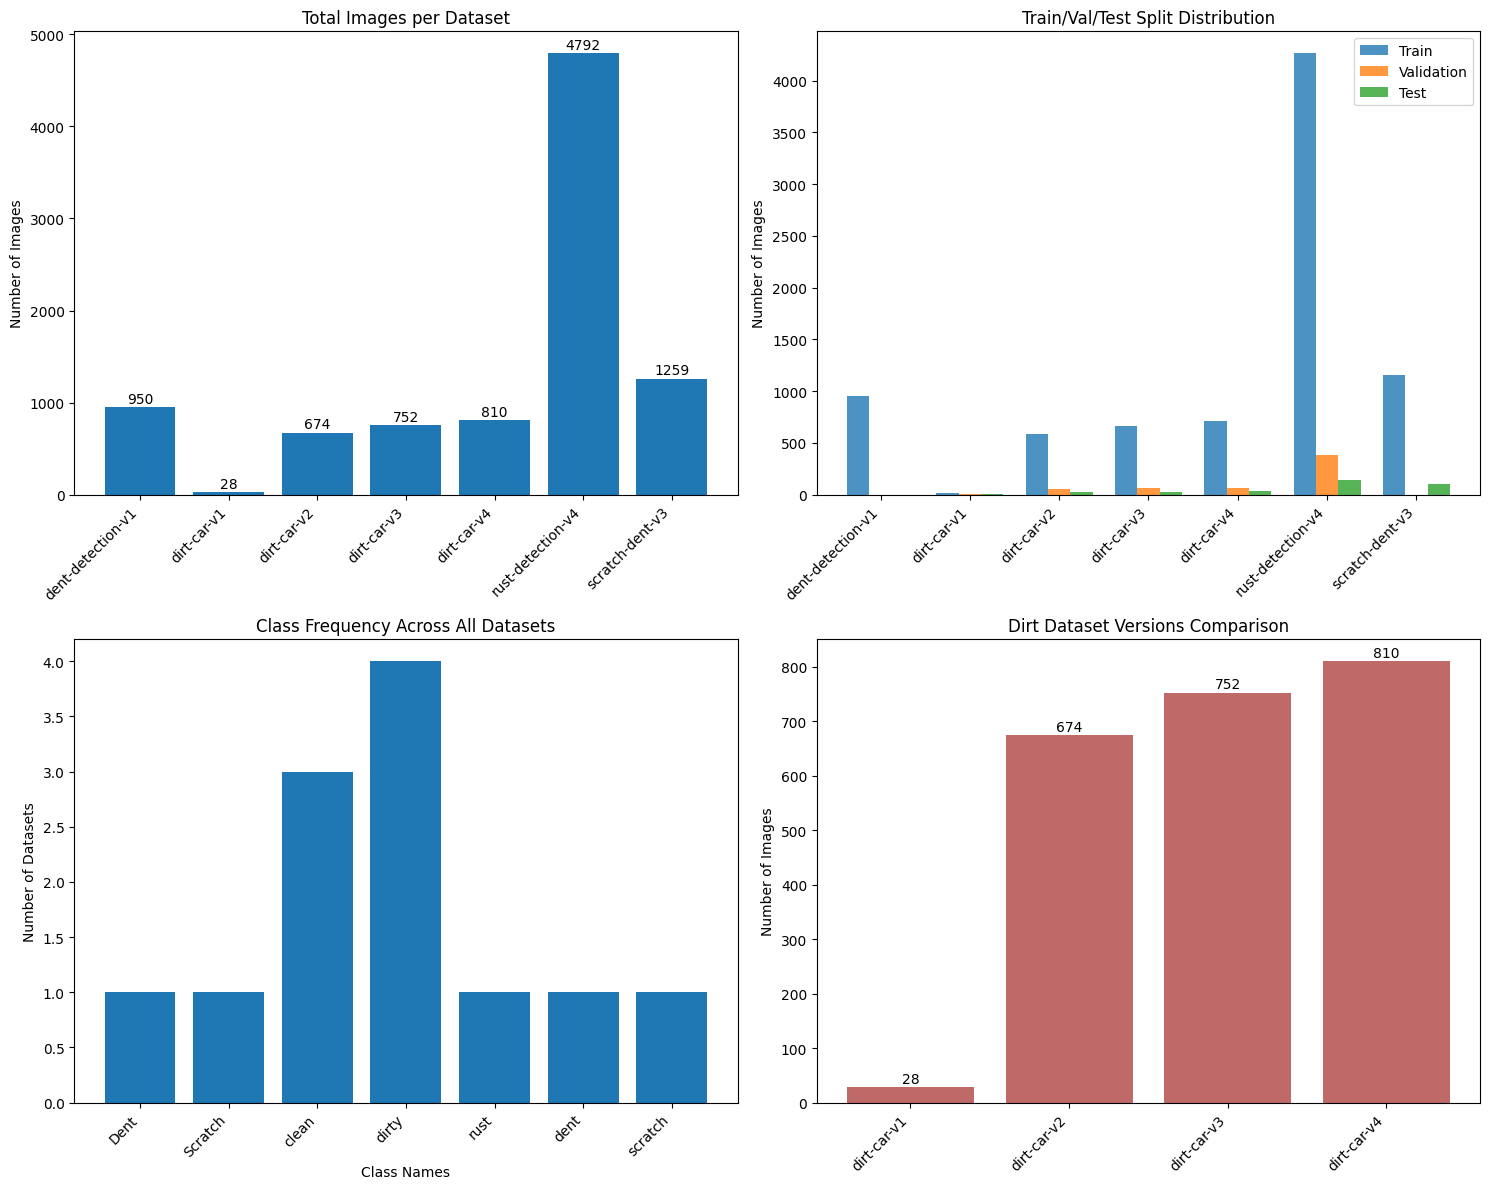

✅ Visualizations created!

🎉 ANALYSIS COMPLETE!
✅ Dataset analysis finished successfully!
📊 Check the summary table and visualizations above
💡 Ready to proceed with dataset standardization


In [ ]:
# =============================================================================
# STEP 1: Install required packages and imports
# =============================================================================

!pip install pandas matplotlib pyyaml

import os
import yaml
import json
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import numpy as np
from collections import defaultdict, Counter
import shutil

print("✅ Packages installed and imported")

# =============================================================================
# STEP 2: Analyze your downloaded datasets
# =============================================================================

def analyze_downloaded_datasets():
    """Analyze your specific downloaded datasets"""

    print("🔍 ANALYZING YOUR DOWNLOADED DATASETS")
    print("="*60)

    # Your dataset folders
    dataset_folders = [
        "datasets/raw/dent-detection-v1",
        "datasets/raw/dirt-car-v1",
        "datasets/raw/dirt-car-v2",
        "datasets/raw/dirt-car-v3",
        "datasets/raw/dirt-car-v4",
        "datasets/raw/rust-detection-v4",
        "datasets/raw/scratch-dent-v3"
    ]

    analysis_results = {}

    for dataset_path in dataset_folders:
        dataset_name = Path(dataset_path).name
        print(f"\n{'='*40}")
        print(f"📁 Analyzing: {dataset_name}")
        print(f"{'='*40}")

        if not Path(dataset_path).exists():
            print(f"❌ Folder not found: {dataset_path}")
            continue

        analysis = analyze_single_dataset(dataset_path)
        analysis_results[dataset_name] = analysis

        # Print key info
        print(f"✅ Classes: {analysis['classes']}")
        print(f"📊 Total images: {analysis['total_images']}")
        print(f"🗂️ Splits - Train: {analysis['train_images']}, Val: {analysis['val_images']}, Test: {analysis['test_images']}")

        # Show class distribution in training set
        if 'train' in analysis['class_counts']:
            print(f"🏷️ Train class distribution: {analysis['class_counts']['train']}")

    return analysis_results

def analyze_single_dataset(dataset_path):
    """Analyze structure of a single dataset"""

    dataset_path = Path(dataset_path)
    analysis = {
        'path': str(dataset_path),
        'classes': [],
        'class_counts': {},
        'total_images': 0,
        'train_images': 0,
        'val_images': 0,
        'test_images': 0,
        'yaml_content': None
    }

    # Check for data.yaml
    yaml_file = dataset_path / 'data.yaml'
    if yaml_file.exists():
        try:
            with open(yaml_file, 'r') as f:
                yaml_data = yaml.safe_load(f)
                analysis['classes'] = yaml_data.get('names', [])
                analysis['yaml_content'] = yaml_data
                print(f"  📄 Found data.yaml with classes: {analysis['classes']}")
        except Exception as e:
            print(f"  ⚠️ Error reading data.yaml: {e}")
    else:
        print(f"  ❌ No data.yaml found")

    # Analyze each split
    for split in ['train', 'valid', 'val', 'test']:
        split_path = dataset_path / split
        if not split_path.exists():
            continue

        images_path = split_path / 'images'
        labels_path = split_path / 'labels'

        if images_path.exists():
            image_files = list(images_path.glob('*'))
            image_count = len([f for f in image_files if f.suffix.lower() in ['.jpg', '.jpeg', '.png']])

            print(f"  📸 {split}: {image_count} images")

            # Update counts
            if split == 'train':
                analysis['train_images'] = image_count
            elif split in ['valid', 'val']:
                analysis['val_images'] = image_count
            elif split == 'test':
                analysis['test_images'] = image_count

            # Count classes in labels
            if labels_path.exists():
                class_counts = Counter()

                for img_file in image_files[:100]:  # Sample first 100 to avoid too much processing
                    label_file = labels_path / (img_file.stem + '.txt')
                    if label_file.exists():
                        try:
                            with open(label_file, 'r') as f:
                                for line in f:
                                    parts = line.strip().split()
                                    if len(parts) >= 5:
                                        class_id = int(parts[0])
                                        class_counts[class_id] += 1
                        except Exception as e:
                            continue

                if class_counts:
                    analysis['class_counts'][split] = dict(class_counts)
                    print(f"    🏷️ Class distribution: {dict(class_counts)}")
            else:
                print(f"    ⚠️ No labels folder found for {split}")

    analysis['total_images'] = analysis['train_images'] + analysis['val_images'] + analysis['test_images']
    return analysis

# Run the analysis
print("🚀 Starting analysis...")
results = analyze_downloaded_datasets()

# =============================================================================
# STEP 3: Create comprehensive summary
# =============================================================================

def create_summary_report(analysis_results):
    """Create a detailed summary report"""

    print(f"\n{'='*70}")
    print("📋 COMPREHENSIVE SUMMARY REPORT")
    print(f"{'='*70}")

    # Create summary table
    summary_data = []
    all_classes = []
    total_images_all = 0

    for dataset_name, analysis in analysis_results.items():
        summary_data.append({
            'Dataset': dataset_name,
            'Classes': analysis['classes'],
            'Class_Count': len(analysis['classes']),
            'Total_Images': analysis['total_images'],
            'Train': analysis['train_images'],
            'Val': analysis['val_images'],
            'Test': analysis['test_images']
        })

        total_images_all += analysis['total_images']
        all_classes.extend(analysis['classes'])

    # Display summary table
    df = pd.DataFrame(summary_data)
    print("\n📊 DATASET OVERVIEW:")
    print(df.to_string(index=False))

    print(f"\n🎯 KEY STATISTICS:")
    print(f"   📁 Total datasets: {len(analysis_results)}")
    print(f"   🖼️ Total images: {total_images_all:,}")
    print(f"   🏷️ Unique classes across all datasets: {len(set(all_classes))}")

    # Analyze class overlaps
    print(f"\n🔍 CLASS ANALYSIS:")
    class_frequency = Counter(all_classes)

    for class_name, count in class_frequency.most_common():
        datasets_with_class = [name for name, analysis in analysis_results.items()
                              if class_name in analysis['classes']]
        print(f"   '{class_name}': appears in {count} dataset(s) - {datasets_with_class}")

    # Dirt dataset comparison
    print(f"\n🧹 DIRT DATASET VERSIONS COMPARISON:")
    dirt_datasets = {name: analysis for name, analysis in analysis_results.items()
                    if 'dirt-car' in name}

    if dirt_datasets:
        for name, analysis in sorted(dirt_datasets.items()):
            print(f"   {name}: {analysis['total_images']} images, classes: {analysis['classes']}")

        # Recommendation for dirt datasets
        max_images_dirt = max(dirt_datasets.values(), key=lambda x: x['total_images'])
        recommended_dirt = [name for name, analysis in dirt_datasets.items()
                           if analysis == max_images_dirt][0]
        print(f"   💡 Recommendation: Use '{recommended_dirt}' as primary (most images)")

    return summary_data, class_frequency

# Create summary
summary_data, class_freq = create_summary_report(results)

# =============================================================================
# STEP 4: Visualize class distributions
# =============================================================================

def visualize_datasets(analysis_results):
    """Create visualizations of dataset distributions"""

    print(f"\n📈 CREATING VISUALIZATIONS...")

    # 1. Dataset size comparison
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

    # Dataset sizes
    dataset_names = list(analysis_results.keys())
    total_images = [analysis_results[name]['total_images'] for name in dataset_names]

    ax1.bar(range(len(dataset_names)), total_images)
    ax1.set_title('Total Images per Dataset')
    ax1.set_xticks(range(len(dataset_names)))
    ax1.set_xticklabels(dataset_names, rotation=45, ha='right')
    ax1.set_ylabel('Number of Images')

    # Add value labels on bars
    for i, v in enumerate(total_images):
        ax1.text(i, v + max(total_images)*0.01, str(v), ha='center')

    # Split distribution
    train_counts = [analysis_results[name]['train_images'] for name in dataset_names]
    val_counts = [analysis_results[name]['val_images'] for name in dataset_names]
    test_counts = [analysis_results[name]['test_images'] for name in dataset_names]

    x = np.arange(len(dataset_names))
    width = 0.25

    ax2.bar(x - width, train_counts, width, label='Train', alpha=0.8)
    ax2.bar(x, val_counts, width, label='Validation', alpha=0.8)
    ax2.bar(x + width, test_counts, width, label='Test', alpha=0.8)

    ax2.set_title('Train/Val/Test Split Distribution')
    ax2.set_xticks(x)
    ax2.set_xticklabels(dataset_names, rotation=45, ha='right')
    ax2.set_ylabel('Number of Images')
    ax2.legend()

    # Class frequency across datasets
    all_classes = []
    for analysis in analysis_results.values():
        all_classes.extend(analysis['classes'])

    class_counts = Counter(all_classes)

    if class_counts:
        classes = list(class_counts.keys())
        counts = list(class_counts.values())

        ax3.bar(classes, counts)
        ax3.set_title('Class Frequency Across All Datasets')
        ax3.set_ylabel('Number of Datasets')
        ax3.set_xlabel('Class Names')

        # Rotate labels if too many
        if len(classes) > 5:
            ax3.set_xticklabels(classes, rotation=45, ha='right')

    # Dirt dataset version comparison
    dirt_datasets = {name: analysis for name, analysis in analysis_results.items()
                    if 'dirt-car' in name}

    if dirt_datasets:
        dirt_names = list(dirt_datasets.keys())
        dirt_images = [dirt_datasets[name]['total_images'] for name in dirt_names]

        ax4.bar(dirt_names, dirt_images, color='brown', alpha=0.7)
        ax4.set_title('Dirt Dataset Versions Comparison')
        ax4.set_ylabel('Number of Images')
        ax4.set_xticklabels(dirt_names, rotation=45, ha='right')

        # Add values on bars
        for i, v in enumerate(dirt_images):
            ax4.text(i, v + max(dirt_images)*0.01, str(v), ha='center')

    plt.tight_layout()
    plt.show()

    print("✅ Visualizations created!")

# Create visualizations
visualize_datasets(results)

print(f"\n🎉 ANALYSIS COMPLETE!")
print("="*50)
print("✅ Dataset analysis finished successfully!")
print("📊 Check the summary table and visualizations above")
print("💡 Ready to proceed with dataset standardization")

In [ ]:
# Smart Dataset Standardization and Splitting
# Based on your analysis results

import os
import shutil
import random
import yaml
from pathlib import Path
from collections import defaultdict, Counter
import numpy as np

class SmartDatasetStandardizer:
    def __init__(self):
        """
        Initialize with standardized class mapping based on your analysis
        """
        # Standardized classes (0-indexed for YOLO)
        self.unified_classes = {
            0: 'dirt',      # For dirty cars
            1: 'scratch',   # For scratches
            2: 'dent',      # For dents
            3: 'rust',       # For rust
            4: 'clean'
        }

        # Mapping from original class names to unified IDs
        # Based on your analysis results
        self.class_mapping = {
            # Dirt/Clean variations
            'dirty': 0,
            'clean': 4,  # We'll skip clean images for now (focus on damage detection)

            # Scratch variations (case-sensitive based on your data)
            'scratch': 1,   # lowercase from scratch-dent-v3
            'Scratch': 1,   # uppercase from dent-detection-v1

            # Dent variations
            'dent': 2,      # lowercase from scratch-dent-v3
            'Dent': 2,      # uppercase from dent-detection-v1

            # Rust
            'rust': 3
        }

        self.dataset_configs = {
            'dent-detection-v1': {
                'path': 'datasets/raw/dent-detection-v1',
                'classes': ['Dent', 'Scratch'],
                'priority': 'high',
                'use_splits': ['train']
            },
            'dirt-car-v4': {
                'path': 'datasets/raw/dirt-car-v4',
                'classes': ['clean', 'dirty'],
                'priority': 'high',
                'use_splits': ['train', 'valid', 'test']
            },
            'dirt-car-v3': {
                'path': 'datasets/raw/dirt-car-v3',
                'classes': ['clean', 'dirty'],
                'priority': 'medium',
                'use_splits': ['train', 'valid', 'test']
            },
            'dirt-car-v2': {
                'path': 'datasets/raw/dirt-car-v2',
                'classes': ['dirty'],
                'priority': 'medium',
                'use_splits': ['train', 'valid', 'test']
            },
            'dirt-car-v1': {
                'path': 'datasets/raw/dirt-car-v1',
                'classes': ['clean', 'dirty'],
                'priority': 'low',
                'use_splits': ['train', 'valid', 'test']
            },
            'rust-detection-v4': {
                'path': 'datasets/raw/rust-detection-v4',
                'classes': ['rust'],
                'priority': 'high',
                'use_splits': ['train', 'valid', 'test']
            },
            'scratch-dent-v3': {
                'path': 'datasets/raw/scratch-dent-v3',
                'classes': ['dent', 'scratch'],
                'priority': 'high',
                'use_splits': ['train', 'test']
            }
        }

        print("🎯 Unified Class Mapping:")
        for original, unified_id in self.class_mapping.items():
            if unified_id is not None:
                unified_name = self.unified_classes[unified_id]
                print(f"   '{original}' → {unified_id}: '{unified_name}'")
            else:
                print(f"   '{original}' → SKIP")

    def analyze_dataset_overlap(self):
        """
        Analyze potential overlaps between dirt datasets
        """
        print(f"\n🔍 ANALYZING DATASET OVERLAPS...")

        dirt_datasets = [
            'datasets/raw/dirt-car-v1',
            'datasets/raw/dirt-car-v2',
            'datasets/raw/dirt-car-v3',
            'datasets/raw/dirt-car-v4'
        ]

        # Sample some images to check for potential duplicates
        # This is a heuristic - in real production you'd use image hashing

        overlap_analysis = {}

        for dataset_path in dirt_datasets:
            dataset_name = Path(dataset_path).name
            train_images = Path(dataset_path) / 'train' / 'images'

            if train_images.exists():
                image_files = list(train_images.glob('*'))[:20]  # Sample first 20
                file_sizes = [img.stat().st_size for img in image_files if img.exists()]

                overlap_analysis[dataset_name] = {
                    'sample_sizes': file_sizes,
                    'avg_size': np.mean(file_sizes) if file_sizes else 0,
                    'total_files': len(list(train_images.glob('*')))
                }

        # Print analysis
        for dataset, analysis in overlap_analysis.items():
            print(f"   {dataset}: {analysis['total_files']} files, avg size: {analysis['avg_size']:.0f} bytes")

        # Strategy: Use all datasets but prioritize by size
        print(f"\n💡 Strategy: Using ALL datasets with smart deduplication during splitting")

        return overlap_analysis

    def create_unified_dataset(self, output_path='datasets/unified_car_condition'):
        """
        Create unified dataset with smart train/val/test splitting
        """
        print(f"\n🔧 CREATING UNIFIED DATASET")
        print("="*60)

        output_path = Path(output_path)

        # Create output structure
        for split in ['train', 'val', 'test']:
            (output_path / split / 'images').mkdir(parents=True, exist_ok=True)
            (output_path / split / 'labels').mkdir(parents=True, exist_ok=True)


        # Collect all samples with metadata
        all_samples = []
        dataset_stats = {}

        for dataset_name, config in self.dataset_configs.items():
            print(f"\n📦 Processing {dataset_name} (priority: {config['priority']})...")

            samples, stats = self.process_dataset(
                config['path'],
                config['classes'],
                config['use_splits'],
                dataset_name
            )

            all_samples.extend(samples)
            dataset_stats[dataset_name] = stats

            print(f"   ✅ Collected {len(samples)} valid samples")

        print(f"\n📊 Total samples collected: {len(all_samples)}")

        # Smart splitting strategy
        train_samples, val_samples, test_samples = self.smart_split(
            all_samples, dataset_stats
        )

        # Copy files to unified structure
        self.copy_samples_to_unified(train_samples, output_path / 'train')
        self.copy_samples_to_unified(val_samples, output_path / 'val')
        self.copy_samples_to_unified(test_samples, output_path / 'test')

        # Create unified data.yaml
        self.create_unified_yaml(output_path)

        # Final statistics
        self.print_final_statistics(output_path, dataset_stats)

        return output_path

    def process_dataset(self, dataset_path, original_classes, use_splits, dataset_name):
        """Process a single dataset and return valid samples"""

        dataset_path = Path(dataset_path)
        samples = []
        stats = {
            'original_samples': 0,
            'valid_samples': 0,
            'skipped_clean': 0,
            'class_distribution': Counter()
        }

        for split in use_splits:
            split_path = dataset_path / split
            if not split_path.exists():
                continue

            images_path = split_path / 'images'
            labels_path = split_path / 'labels'

            if not images_path.exists():
                continue

            image_files = [f for f in images_path.glob('*')
                          if f.suffix.lower() in ['.jpg', '.jpeg', '.png']]

            for img_file in image_files:
                label_file = labels_path / (img_file.stem + '.txt')
                stats['original_samples'] += 1

                if label_file.exists():
                    converted_labels = self.convert_labels(
                        label_file, original_classes, dataset_name
                    )

                    if converted_labels:  # Has valid converted labels
                        samples.append({
                            'image_path': img_file,
                            'converted_labels': converted_labels,
                            'dataset': dataset_name,
                            'original_split': split,
                            'priority': self.dataset_configs[dataset_name]['priority']
                        })
                        stats['valid_samples'] += 1

                        # Count classes
                        for label in converted_labels:
                            class_id = int(label.split()[0])
                            stats['class_distribution'][class_id] += 1
                    else:
                        stats['skipped_clean'] += 1

        return samples, stats

    def convert_labels(self, label_file, original_classes, dataset_name):
        """Convert labels to unified format"""

        converted = []

        with open(label_file, 'r') as f:
            lines = f.readlines()

        for line in lines:
            parts = line.strip().split()
            if len(parts) >= 5:
                old_class_id = int(parts[0])

                if old_class_id < len(original_classes):
                    old_class_name = original_classes[old_class_id]

                    # Map to unified class ID
                    new_class_id = self.class_mapping.get(old_class_name)

                    if new_class_id is not None:
                        # Keep original bbox coordinates (normalized)
                        converted.append(f"{new_class_id} {' '.join(parts[1:])}")

        return converted

    def smart_split(self, all_samples, dataset_stats):
        """
        Smart splitting strategy:
        - Ensure all classes are represented in each split
        - Balance high-priority datasets across splits
        - Maintain reasonable proportions (70/20/10)
        """
        print(f"\n🧠 APPLYING SMART SPLITTING STRATEGY...")

        # Group samples by class and dataset priority
        class_groups = defaultdict(list)

        for sample in all_samples:
            # Determine primary class for this sample
            label_lines = sample['converted_labels']
            if label_lines:
                primary_class = int(label_lines[0].split()[0])
                class_groups[primary_class].append(sample)

        print(f"📊 Class distribution:")
        for class_id, samples in class_groups.items():
            class_name = self.unified_classes[class_id]
            print(f"   {class_name} ({class_id}): {len(samples)} samples")

        # Split each class proportionally
        train_samples = []
        val_samples = []
        test_samples = []

        for class_id, samples in class_groups.items():
            class_name = self.unified_classes[class_id]

            # Shuffle samples
            random.shuffle(samples)

            # Calculate splits (70/20/10)
            n_total = len(samples)
            n_train = int(n_total * 0.70)
            n_val = int(n_total * 0.20)
            n_test = n_total - n_train - n_val

            # Ensure minimum samples per split
            if n_val < 1 and n_total > 2:
                n_val = 1
                n_train -= 1
            if n_test < 1 and n_total > 5:
                n_test = 1
                n_train -= 1

            class_train = samples[:n_train]
            class_val = samples[n_train:n_train+n_val]
            class_test = samples[n_train+n_val:]

            train_samples.extend(class_train)
            val_samples.extend(class_val)
            test_samples.extend(class_test)

            print(f"   {class_name}: {len(class_train)} train, {len(class_val)} val, {len(class_test)} test")

        # Final shuffle
        random.shuffle(train_samples)
        random.shuffle(val_samples)
        random.shuffle(test_samples)

        print(f"\n✅ Final split: {len(train_samples)} train, {len(val_samples)} val, {len(test_samples)} test")

        return train_samples, val_samples, test_samples

    def copy_samples_to_unified(self, samples, output_split_path):
        """Copy samples to unified directory structure"""

        images_path = output_split_path / 'images'
        labels_path = output_split_path / 'labels'

        for i, sample in enumerate(samples):
            # Create unique filename
            img_ext = sample['image_path'].suffix
            base_name = f"{i:06d}_{sample['dataset']}"

            # Copy image
            shutil.copy2(sample['image_path'], images_path / f"{base_name}{img_ext}")

            # Write converted labels
            with open(labels_path / f"{base_name}.txt", 'w') as f:
                f.write('\n'.join(sample['converted_labels']))

    def create_unified_yaml(self, output_path):
        """Create data.yaml for unified dataset"""

        yaml_content = {
            'path': str(output_path.absolute()),
            'train': 'train/images',
            'val': 'val/images',
            'test': 'test/images',
            'nc': len(self.unified_classes),
            'names': list(self.unified_classes.values())
        }

        with open(output_path / 'data.yaml', 'w') as f:
            yaml.dump(yaml_content, f, default_flow_style=False)

        print(f"\n📄 Created unified data.yaml")

    def print_final_statistics(self, output_path, dataset_stats):
        """Print comprehensive final statistics"""

        print(f"\n{'='*70}")
        print("🎉 UNIFIED DATASET CREATION COMPLETE!")
        print(f"{'='*70}")

        # Count final files
        final_counts = {}
        total_final = 0

        for split in ['train', 'val', 'test']:
            images_path = output_path / split / 'images'
            if images_path.exists():
                count = len(list(images_path.glob('*')))
                final_counts[split] = count
                total_final += count
            else:
                final_counts[split] = 0

        print(f"📊 FINAL DATASET STATISTICS:")
        print(f"   🗂️ Total images: {total_final:,}")
        print(f"   📈 Train: {final_counts['train']:,} ({final_counts['train']/total_final*100:.1f}%)")
        print(f"   🔍 Validation: {final_counts['val']:,} ({final_counts['val']/total_final*100:.1f}%)")
        print(f"   🧪 Test: {final_counts['test']:,} ({final_counts['test']/total_final*100:.1f}%)")

        # Class distribution in final dataset
        print(f"\n🏷️ FINAL CLASS DISTRIBUTION:")
        overall_class_counts = Counter()

        for split in ['train', 'val', 'test']:
            labels_path = output_path / split / 'labels'
            if labels_path.exists():
                for label_file in labels_path.glob('*.txt'):
                    with open(label_file, 'r') as f:
                        for line in f:
                            parts = line.strip().split()
                            if len(parts) >= 5:
                                class_id = int(parts[0])
                                overall_class_counts[class_id] += 1

        total_annotations = sum(overall_class_counts.values())
        for class_id in sorted(overall_class_counts.keys()):
            class_name = self.unified_classes[class_id]
            count = overall_class_counts[class_id]
            percentage = count / total_annotations * 100
            print(f"   {class_name} ({class_id}): {count:,} annotations ({percentage:.1f}%)")

        # Dataset contribution summary
        print(f"\n📦 DATASET CONTRIBUTION SUMMARY:")
        total_original = sum(stats['original_samples'] for stats in dataset_stats.values())
        total_used = sum(stats['valid_samples'] for stats in dataset_stats.values())

        for dataset_name, stats in dataset_stats.items():
            usage_rate = stats['valid_samples'] / stats['original_samples'] * 100 if stats['original_samples'] > 0 else 0
            print(f"   {dataset_name}:")
            print(f"      Original: {stats['original_samples']:,}, Used: {stats['valid_samples']:,} ({usage_rate:.1f}%)")
            if stats['skipped_clean'] > 0:
                print(f"      Skipped clean images: {stats['skipped_clean']:,}")

        print(f"\n✅ Overall usage: {total_used:,}/{total_original:,} ({total_used/total_original*100:.1f}%)")
        print(f"📁 Unified dataset location: {output_path}")
        print(f"🚀 Ready for YOLO training!")

# =============================================================================
# MAIN EXECUTION
# =============================================================================

def main():
    """Execute the complete standardization pipeline"""

    print("🚗 Car Condition Detection - Smart Dataset Standardization")
    print("="*80)

    # Set random seed for reproducible splits
    random.seed(42)
    np.random.seed(42)

    # Initialize standardizer
    standardizer = SmartDatasetStandardizer()

    # Analyze overlaps
    overlap_analysis = standardizer.analyze_dataset_overlap()

    # Ask for confirmation
    print(f"\n{'='*60}")
    print("🤔 STANDARDIZATION PLAN:")
    print("✅ Merge all 7 datasets into unified structure")
    print("✅ Standardize class names: dirt, scratch, dent, rust")
    print("✅ Skip 'clean' images (focus on damage detection)")
    print("✅ Smart train/val/test split (70/20/10)")
    print("✅ Ensure all classes represented in each split")
    print("✅ Maintain dataset diversity across splits")

    proceed = input(f"\nProceed with standardization? (y/n): ")

    if proceed.lower() != 'y':
        print("❌ Standardization cancelled.")
        return

    # Create unified dataset
    print(f"\n🚀 Starting standardization process...")

    try:
        unified_path = standardizer.create_unified_dataset()

        print(f"\n🎊 SUCCESS! 🎊")
        print(f"Unified dataset created successfully!")
        print(f"Location: {unified_path}")
        print(f"Ready to train your multi-class YOLO model!")

    except Exception as e:
        print(f"❌ Error during standardization: {e}")
        import traceback
        traceback.print_exc()

if __name__ == "__main__":
    main()


🚗 Car Condition Detection - Smart Dataset Standardization
🎯 Unified Class Mapping:
   'dirty' → 0: 'dirt'
   'clean' → 4: 'clean'
   'scratch' → 1: 'scratch'
   'Scratch' → 1: 'scratch'
   'dent' → 2: 'dent'
   'Dent' → 2: 'dent'
   'rust' → 3: 'rust'

🔍 ANALYZING DATASET OVERLAPS...
   dirt-car-v1: 20 files, avg size: 118139 bytes
   dirt-car-v2: 591 files, avg size: 55346 bytes
   dirt-car-v3: 660 files, avg size: 54401 bytes
   dirt-car-v4: 711 files, avg size: 49589 bytes

💡 Strategy: Using ALL datasets with smart deduplication during splitting

🤔 STANDARDIZATION PLAN:
✅ Merge all 7 datasets into unified structure
✅ Standardize class names: dirt, scratch, dent, rust
✅ Skip 'clean' images (focus on damage detection)
✅ Smart train/val/test split (70/20/10)
✅ Ensure all classes represented in each split
✅ Maintain dataset diversity across splits

Proceed with standardization? (y/n): y

🚀 Starting standardization process...

🔧 CREATING UNIFIED DATASET

📦 Processing dent-detection-v1 (p

✅ SAM model already loaded.
🤖 Generated a 5x5 grid of prompt points.
📊 Analysis complete:
   - Car Segment Area: 271131 pixels
   - Total Image Area: 409600 pixels
   - Coverage Ratio: 66.19%
ℹ️ CONCLUSION: The car is only a part of the image (66%).


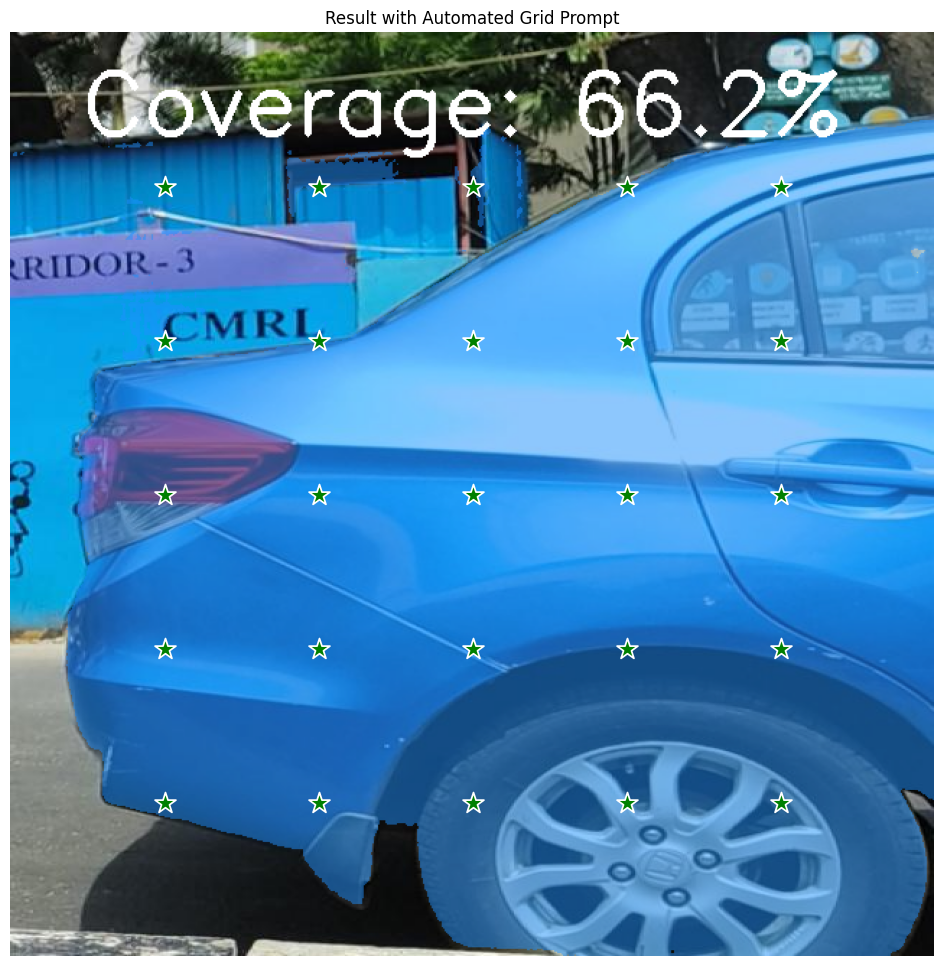

In [ ]:
#@title 🤖 Run SAM with an Automated Grid Prompt

import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt
from segment_anything import sam_model_registry, SamPredictor
import os

# --- Step 1: Set the path to your image ---
image_path = "/content/datasets/unified_car_condition/test/images/000105_scratch-dent-v3.jpg"  # <-- PASTE YOUR IMAGE PATH HERE

# --- Step 2: Set the analysis threshold ---
# If the car covers more than this percentage of the image,
# we'll consider it to be the main subject. (0.8 = 80%)
COVERAGE_THRESHOLD = 0.8

if os.path.exists(image_path):
    # --- Model Loading (runs only once) ---
    if 'predictor' not in locals():
        print("Loading SAM model... This might take a moment.")
        MODEL_TYPE = "vit_h"
        CHECKPOINT_PATH = "sam_checkpoint.pth"
        device = "cuda" if torch.cuda.is_available() else "cpu"
        sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH)
        sam.to(device=device)
        predictor = SamPredictor(sam)
        print("✅ SAM model loaded.")
    else:
        print("✅ SAM model already loaded.")

    # --- Image Loading ---
    image_bgr = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    predictor.set_image(image_rgb)
    height, width, _ = image_rgb.shape
    total_image_area = height * width

    # --- Automated Prompt Generation (3x3 Grid) ---
    # We create a grid of points to cover the image.
    # This acts as our automatic, "unbiased" prompt.
    grid_size = 5
# This new logic calculates the start/end points to create a smaller, even border
    x = np.linspace(width / (grid_size + 1), width * grid_size / (grid_size + 1), grid_size)
    y = np.linspace(height / (grid_size + 1), height * grid_size / (grid_size + 1), grid_size)
    xv, yv = np.meshgrid(x, y)
    input_points = np.vstack((xv.flatten(), yv.flatten())).T
    input_labels = np.ones(input_points.shape[0]) # All points are foreground

    print(f"🤖 Generated a {grid_size}x{grid_size} grid of prompt points.")

    # --- Prediction ---
    masks, scores, logits = predictor.predict(
        point_coords=input_points,
        point_labels=input_labels,
        multimask_output=True,
    )
    best_mask = masks[np.argmax(scores)]
    pixel_area = np.sum(best_mask)

    # --- Automated Analysis ---
    coverage_ratio = pixel_area / total_image_area
    print(f"📊 Analysis complete:")
    print(f"   - Car Segment Area: {pixel_area} pixels")
    print(f"   - Total Image Area: {total_image_area} pixels")
    print(f"   - Coverage Ratio: {coverage_ratio:.2%}")

    # --- Final Decision ---
    if coverage_ratio > COVERAGE_THRESHOLD:
        print(f"✅ CONCLUSION: The car takes up most of the image ({coverage_ratio:.0%}).")
    else:
        print(f"ℹ️ CONCLUSION: The car is only a part of the image ({coverage_ratio:.0%}).")


    # --- Visualization ---
    final_image = image_rgb.copy()
    color = np.array([30, 144, 255], dtype=np.uint8)
    alpha = 0.5
    final_image = np.where(best_mask[..., None], color, final_image)
    final_image = cv2.addWeighted(final_image, alpha, image_rgb, 1 - alpha, 0)
    label_text = f"Coverage: {coverage_ratio:.1%}"
    cv2.putText(final_image, label_text, (50, 70), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 3)

    plt.figure(figsize=(12, 12))
    plt.imshow(final_image)
    # Helper to show the grid points
    plt.scatter(input_points[:, 0], input_points[:, 1], color='green', marker='*', s=250, edgecolor='white', linewidth=1.25)
    plt.axis('off')
    plt.title("Result with Automated Grid Prompt")
    plt.show()

else:
    print(f"❌ ERROR: File not found at '{image_path}'.")